In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import string
import numpy as np
import easyocr
import fitz
import collections
import hashlib
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
from pprint import pprint
from tqdm import tqdm

# Initialize OCR
reader = easyocr.Reader([], gpu=True)

In [2]:
# Define input
filename = '../outputs/3.pdf'

# Open file
pdf = fitz.open(filename)

# Get all fonts across document
fonts = list({el for i in range(pdf.page_count) for el in pdf.get_page_fonts(i)})
print(fonts)
embedded_fonts = []

# Loop through fonts
for font in fonts:
    # Extract font
    name, ext, _, content = pdf.extract_font(font[0])
    name = name.split('+')[-1]

    # If font is embedded
    if ext == 'ttf':
        # Write fonts
        filename = hashlib.md5(name.encode('utf-8')).hexdigest() + "." + ext
        f = open("../fonts/" + filename, "wb")
        f.write(content)
        f.close()

        # Append to array
        embedded_fonts.append((filename, name))

print(embedded_fonts)

[(6, 'n/a', 'TrueType', 'TimesNewRomanPSMT', 'F1', 'WinAnsiEncoding'), (9, 'ttf', 'TrueType', 'BCDEEE+TimesNewRomanFake3PSMT', 'F2', 'WinAnsiEncoding')]
[('6f711bf6f241371420c568b82facf04e.ttf', 'TimesNewRomanFake3PSMT')]


0


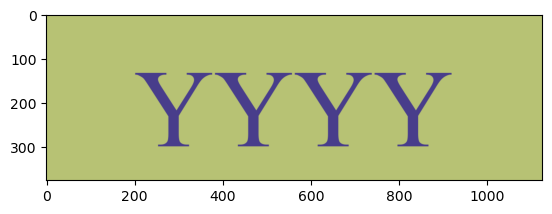

7


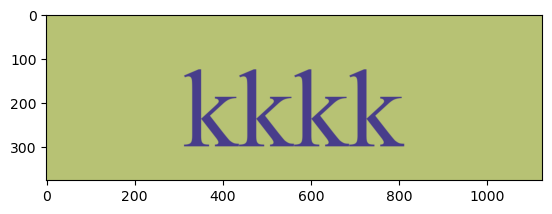

a


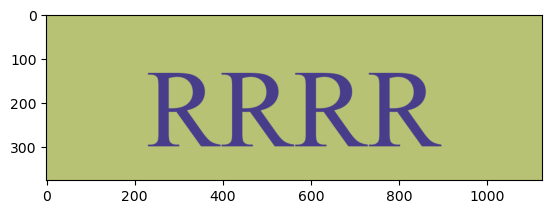

c


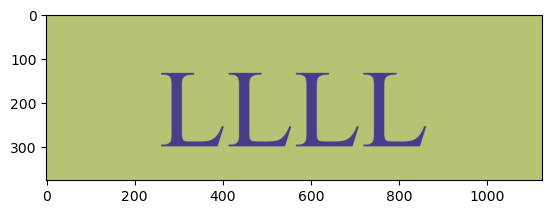

h


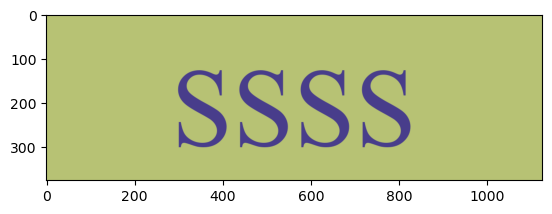

i


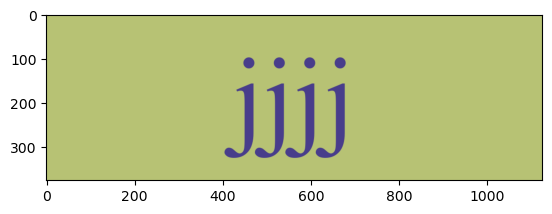

j


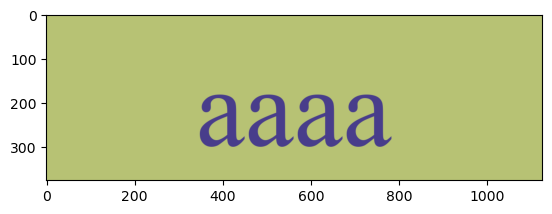

o


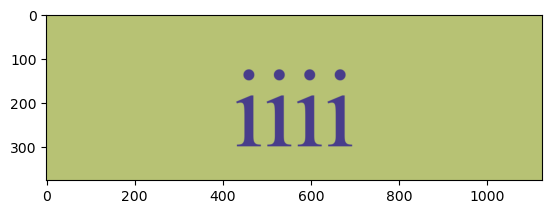

r


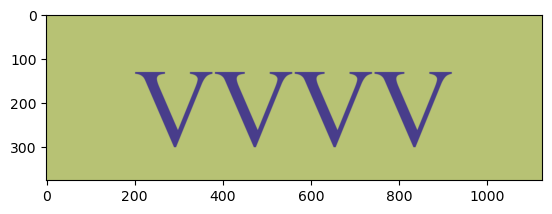

w


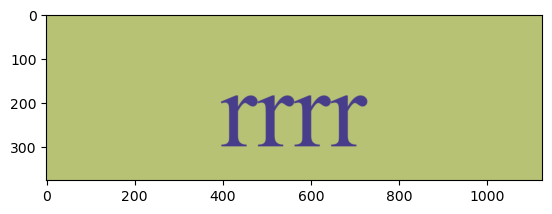

y


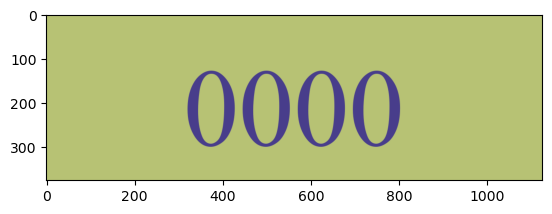

z


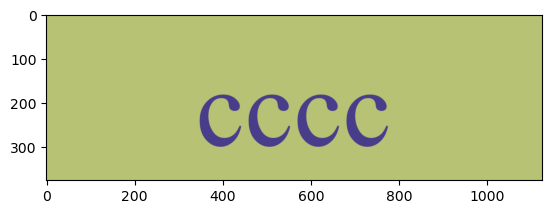

I


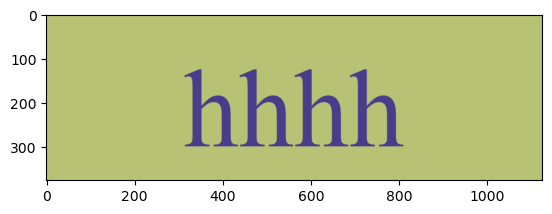

L


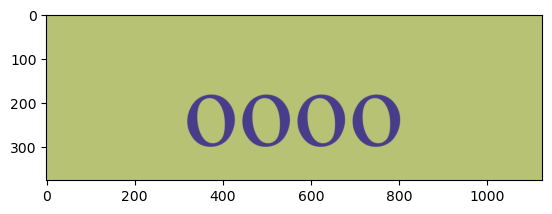

R


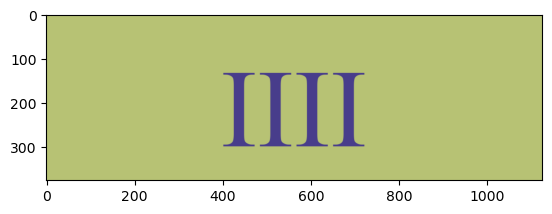

S


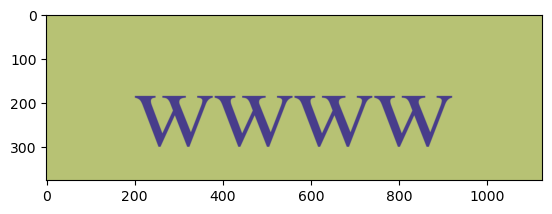

In [3]:
def draw_char(char, typeface, size):
    # Set canvas size
    W, H = (int(size * 1.5) * 3, int(size * 1.5))
    # Set font
    font = ImageFont.truetype(typeface, size)
    # Make empty image
    img = Image.new('RGB', (W, H), color='#B7C274')
    # Draw text to image
    draw = ImageDraw.Draw(img)
    _, _, w, h = font.getbbox(char)
    draw.text(((W-w)/2,(H-h)/2), char, fill='#483d8b', font=font)

    return np.asarray(img)

# Get list possible character
chars = list(string.digits + string.ascii_letters)

# Setup problematic font map
hashmap = {}

# Loop through embedded fonts
for filename, fontname in embedded_fonts:
    hashmap[fontname] = {}
    # Loop through characters
    for char in chars:
        # Render characters
        img = draw_char(char * 4, '../fonts/' + filename, 250)
        # Detect characters with OCR
        result = reader.readtext(img, allowlist=chars)

        # If character detected
        if len(result) > 0:
            # Calculate most character appear
            most_char, total = collections.Counter(result[0][1]).most_common(1)[0]
            # If char not the same
            if most_char.lower() != char.lower():
                # Add to hash map
                hashmap[fontname][char] = True

                # Print char
                print(char)
                plt.imshow(img, cmap='gray')
                plt.show()

    if len(hashmap[fontname].keys()) == 0:
        del hashmap[fontname]

In [15]:
for key, value in hashmap.items():
    print(key, list(value.keys()))

FakeTimesNewRomanRegular ['x']


In [19]:
for page in pdf:
    # read page text as a dictionary, suppressing extra spaces in CJK fonts
    result = page.get_text("rawdict")

    for block in result["blocks"]:  # iterate through the text blocks
        for line in block["lines"]:  # iterate through the text lines
            for span in line["spans"]:  # iterate through the text spans
                for char in span["chars"]:  # iterate through text chars
                    if span['font'] in hashmap and char['c'] in hashmap[span['font']]:
                        print(char['bbox'])

Rect(0.0, 0.0, 595.32, 841.92)
(121.0748519897461, 86.4066162109375, 131.0412139892578, 99.6956787109375)
(129.95486450195312, 86.4066162109375, 139.9212188720703, 99.6956787109375)
(171.97999572753906, 86.4066162109375, 177.51710510253906, 99.6956787109375)
(188.80999755859375, 86.4066162109375, 194.34710693359375, 99.6956787109375)
(230.69000244140625, 86.4066162109375, 236.22711181640625, 99.6956787109375)
(240.1699981689453, 86.4066162109375, 245.7071075439453, 99.6956787109375)
(254.69000244140625, 86.4066162109375, 260.22711181640625, 99.6956787109375)
(286.25, 86.4066162109375, 291.787109375, 99.6956787109375)
(348.7900085449219, 86.4066162109375, 354.3271179199219, 99.6956787109375)
(360.30999755859375, 86.4066162109375, 365.84710693359375, 99.6956787109375)
(385.96484375, 86.4066162109375, 395.9311828613281, 99.6956787109375)
(402.7648620605469, 86.4066162109375, 412.731201171875, 99.6956787109375)
(448.7799987792969, 86.4066162109375, 454.3171081542969, 99.6956787109375)
(479

In [10]:
pdf.get_page_text(0)

'Dxtxset dirxncxng secxrx xrtifisixl menggunxkxn pxckxge sklexrn pxdx python \nmenggunxkxn fungsi mxke_clxssificxtion. Dxtx yxng dihxsilkxn umumnyx bersifxt numerik \ndxn memerlukxn proses klxsterisxsi untuk mendxpxtkxn dxtx nominxl. Pxdx dxtx ini \ndidefinisikxn 10 kolom fitur dxn 1 kolom lxbel. Selxin itu jugx dibuxt 1000 bxris dxtx dengxn \nsebxrxn 50% untuk lxbel “Fxlse” dxn 50% untuk lxbel “True”. Mxksud dxri “True” xdxlxh \nsiswx melxnjutkxn ke perguruxn tinggi sedxngkxn “Fxlse” berxrti tidxk melxnjutkxn ke \nperguruxn tinggi. Berikut xdxlxh fitur-fitur yxng xdx pxdx dxtxset: \n'

In [11]:
# pdf.close()